In [51]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [52]:
PATH = "data/bikes/"
sz=224
torch.cuda.is_available()
torch.backends.cudnn.enabled

True

In [53]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
# eposhes = [3*i for i in range(1, 10)]
# for eposh in eposhes:
#     learn.fit(0.01, eposh)
learn.fit(0.01, 30)

100%|██████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.66s/it]


HBox(children=(IntProgress(value=0, description='Epoch', max=30), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                                
    0      0.774045   0.660952   0.6       
    1      0.651484   0.989586   0.525                                                   
    2      0.542967   0.866521   0.6                                                     
    3      0.512377   0.53288    0.775                                                   
    4      0.516976   0.346199   0.85                                                    
    5      0.470697   0.277112   0.875                                                   
    6      0.435649   0.241178   0.875                                                   
    7      0.394128   0.198168   0.925                                                   
    8      0.495726   0.225425   0.875                                                   
    9      0.446665   0.226201   0.9                                                     
    10     0.401277   0.252689   0.875                  

[0.44802147, 0.800000011920929]

In [54]:
print(data.classes)
print(data.val_y)

['mountain bike', 'road bike']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [55]:
log_preds = learn.predict()
log_preds.shape

(40, 2)

In [56]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1, 0 represents mountain bikes and 1 represents road bikes
probs = np.exp(log_preds[:,1])
print(preds)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0]


In [57]:
#helper functions for plotting
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


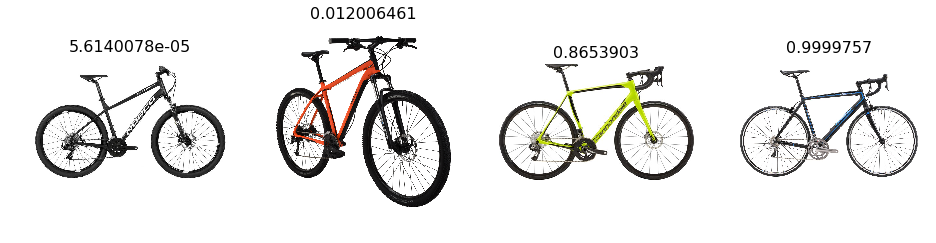

In [58]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


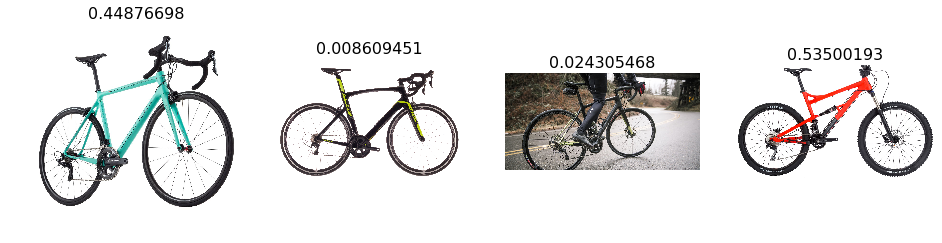

In [59]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [60]:
#helper
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)


Most correct motorcycles


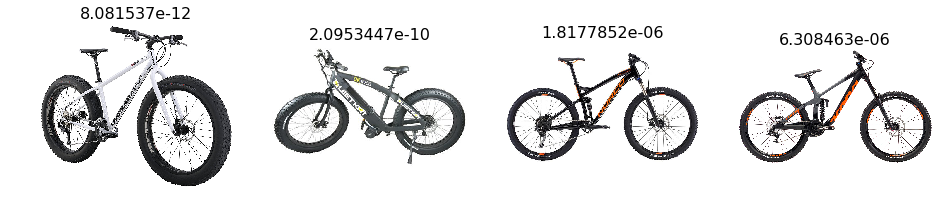

In [61]:
plot_val_with_title(most_by_correct(0, True), "Most correct mountain bikes")

Most correct road bikes


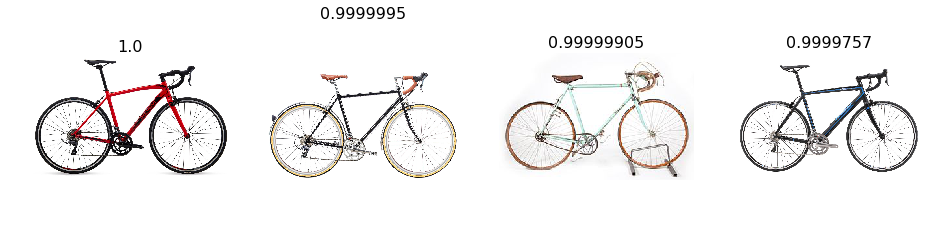

In [65]:
plot_val_with_title(most_by_correct(1, True), "Most correct road bikes")

Most incorrect mountain bikes


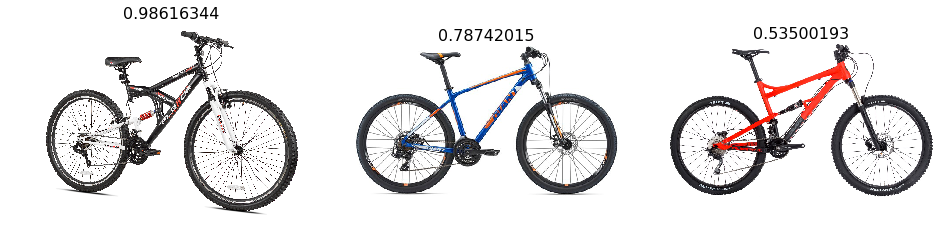

In [66]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect mountain bikes")

Most incorrect road bikes


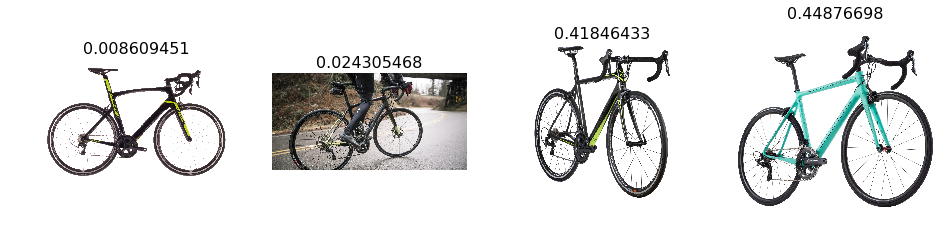

In [67]:
plot_val_with_title(most_by_correct(1,False), "Most incorrect road bikes")